In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Напишем все функции и посчитаем для них выражения производных.
# Функции готовы к массивам numpy
def func_1(x):
    return np.sin(x**2)
def func_1_derivative(x):
    return 2 * x * np.cos(x**2)

def func_2(x):
    return np.cos(np.sin(x))
def func_2_derivative(x):
    return (-1) * np.sin(np.sin(x)) * np.cos(x)

def func_3(x):
    return np.exp(np.sin(np.cos(x)))
def func_3_derivative(x):
    return (-func_3(x)) * np.sin(x) * np.cos(np.cos(x))

def func_4(x):
    return np.log(x+3)
def func_4_derivative(x):
    return 1 / (x + 3)

def func_5(x):
    return (x + 3) ** 0.5
def func_5_derivative(x):
    return ((x + 3) ** -0.5) * 0.5

functions = [func_1, func_2, func_3, func_4, func_5]
real_derivatives = [func_1_derivative, func_2_derivative, func_3_derivative, func_4_derivative, func_5_derivative]

# Запишем выражения для аппроксимированного расчёта производных
def derive_1(func, x, h):
    return (func(x + h) - func(x)) / h
def derive_2(func, x, h):
    return (func(x) - func(x - h)) / h
def derive_3(func, x, h):
    return (func(x + h) - func(x - h)) / (2 * h)
def derive_4(func, x, h):
    return (4 / 3) * (func(x + h) - func(x - h)) / (2 * h) - (1 / 3) * (func(x + 2 * h) - func(x - 2 * h)) / (4 * h)
def derive_5(func, x, h):
    return 3 * (func(x + h) - func(x - h)) / (4 * h) - 3 * (func(x + 2 * h) - func(x - 2 * h)) / (20 * h) + (func(x + 3 * h) - func(x - 3 * h)) / (60 * h)

approximate_derivatives = [derive_1, derive_2, derive_3, derive_4, derive_5]

Похоже, что в точке $x = -3$ не существует функции 4 и производной для неё. Также можно заметить, что производной не существует, если $x \pm [1, 2, 3]*h = -3$.
Т.к. $h_{max} = 1$, точки , которые удалены от $x_0 = -3$ больше чем на $3$, наверняка будут подходить. Например, $x_0 > 0$. Выберем $x_0 = 1.5$, вроде бы нет проблем. До этого я выбрал точку $x_0 = 1$ и у меня поломались графики некоторых функций. При значениях крайне близких к 1, по типу $x_0 = 1 + 10^{-12}$ график также начинает ломаться. Вообще говоря, я не знаю почему так, но наверняка эта точка на границе области определения чего-либо.

In [3]:
x_0 = 1.5

In [4]:
func_titles = [
    "\\sin(x^2)",
    "\\cos(\\sin(x))",
    "\\exp(\\sin(\\cos(x)))",
    "\\ln(x + 3)",
    "(x + 3)^{0.5}",
]

line_titles = [
    "\\frac{f(x + h) - f(x)}{h}",
    "\\frac{f(x) - f(x - h)}{h}",
    "\\frac{f(x + h) - f(x - h)}{2h}",
    "\\frac{4}{3} \\ \\frac{f(x + h) - f (x - h)}{2h} - \\frac{1}{3} \\ \\frac{f(x + 2h) - f(x - 2h)}{4h}",
    "\\frac{3}{2} \\ \\frac{f(x + h) - f(x - h)}{2h} - \\frac{3}{5} \\ \\frac{f(x + 2h) - f(x - 2h)}{4h} + \\frac{1}{10} \\ \\frac{f(x + 3h) - f(x - 3h)}{6h}",
]

Считать погрешность будем довольно простым способом: это модуль разности между точным выражением производной функции и аппроксимированным значением одного из методов.

In [5]:
k = np.arange(1, 22) # [1, 2, ... 20, 21]
h = 2 / (2 ** k) # шаг численного дифференцирования
h # Просто показываю, что numpy работает. Числа выглядят реалистичными.

array([1.00000000e+00, 5.00000000e-01, 2.50000000e-01, 1.25000000e-01,
       6.25000000e-02, 3.12500000e-02, 1.56250000e-02, 7.81250000e-03,
       3.90625000e-03, 1.95312500e-03, 9.76562500e-04, 4.88281250e-04,
       2.44140625e-04, 1.22070312e-04, 6.10351562e-05, 3.05175781e-05,
       1.52587891e-05, 7.62939453e-06, 3.81469727e-06, 1.90734863e-06,
       9.53674316e-07])

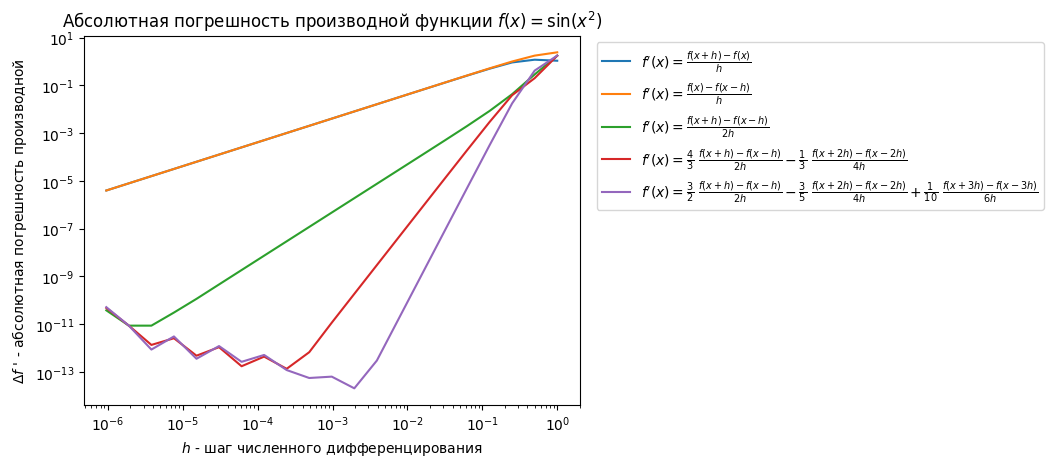

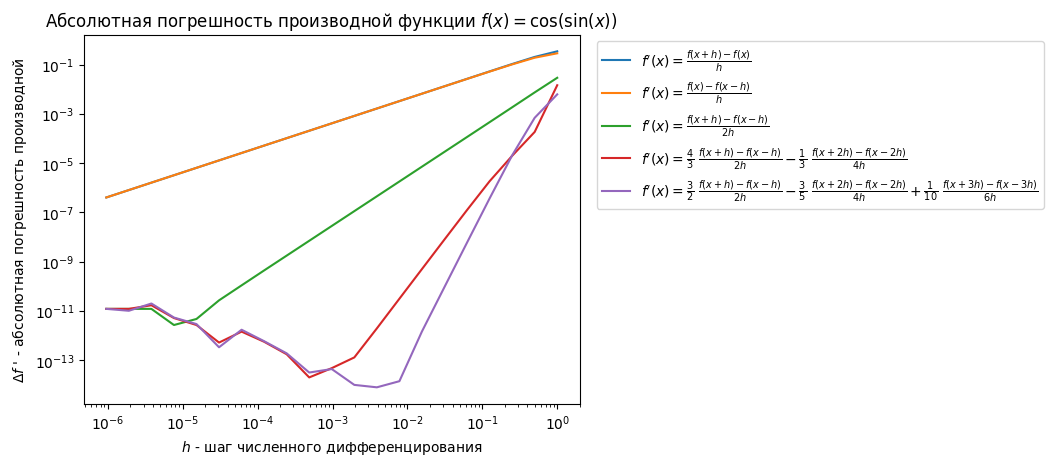

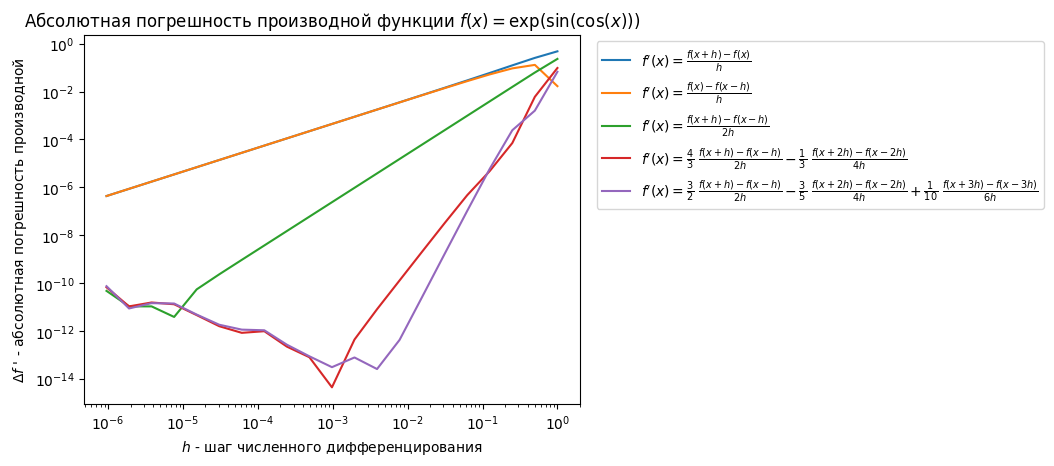

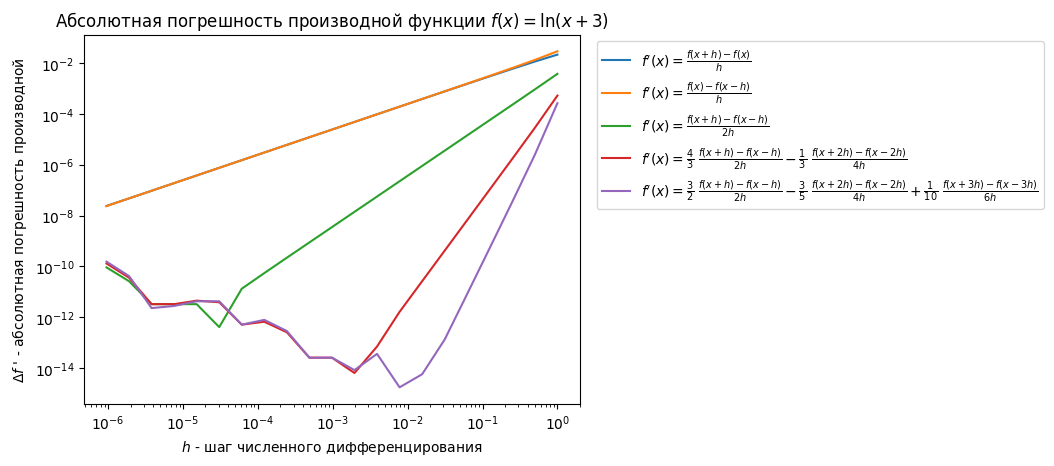

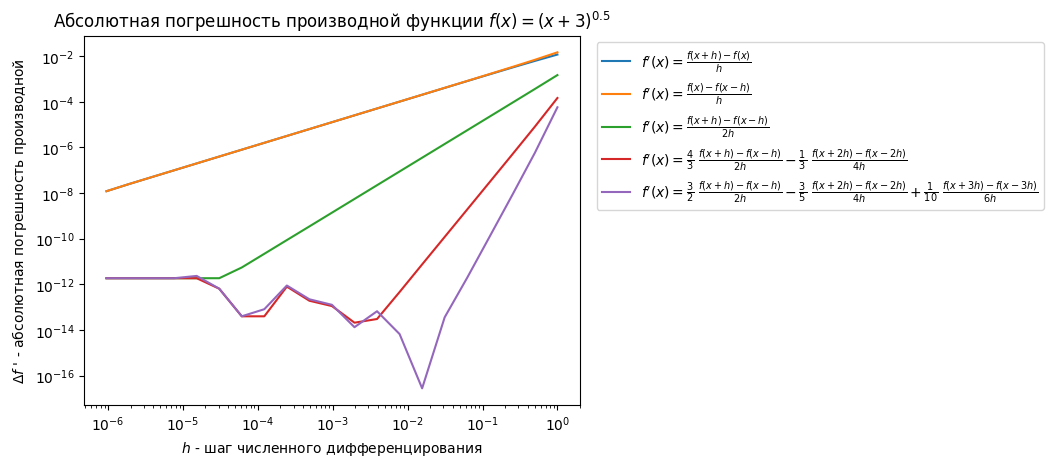

In [6]:
def absolute_error(func_num, deriv_num):
    return abs(approximate_derivatives[deriv_num](functions[func_num], x_0, h) - real_derivatives[func_num](x_0))

for func_num in range(5):
    for deriv_num in range(5):
        x = h
        y = absolute_error(func_num, deriv_num)
        plt.plot(x, y, label=f"$f'(x)={line_titles[deriv_num]}$")
    plt.xlabel("$h$ - шаг численного дифференцирования")
    plt.ylabel("$\\Delta f$ ' - абсолютная погрешность производной")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(f"Абсолютная погрешность производной функции $f(x) = {func_titles[func_num]}$")
    plt.legend(loc='best', bbox_to_anchor=(1.95, 1))
    plt.show()

Т.к. это логарифмичский график, сразу же видны скорости роста погрешности. Считать конкретные значения не будем, но понятно, что у первых двух формул погрешность подобна $O(h)$, у третьей формулы подобна $O(h^{2})$, и наклон графика выше, может быть как раз в два раза. Ну и так же, четвёртая и пятая формулы рассчёта производной всё более и более точные. Интересно, что при этом всё же бывают небольшие исключения из правила, но в целом можно уверенно сказать, что более точные формулы или настолько же точные или более точные для одного и того же шага численного дифференцирования.